<a href="https://colab.research.google.com/github/prayangoud/198-210-CyptoProj/blob/main/198_210_Linear_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance
!pip install pmdarima
!pip install statsmodel

In [4]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import pmdarima as pm
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import LinearRegression

In [42]:
#Download and aggregate the historical price data

#User can enter any ticker they desire
user_ticker_input = input('Enter a ticker symbol. Make sure to attach -USD in the end: ')
ticker = user_ticker_input

#Month time difference
start_date = pd.Timestamp.today() - pd.Timedelta(days=30)
end_date = pd.Timestamp.today()
df_linear_model = yf.download(ticker, start=start_date, end = end_date)

Enter a ticker symbol. Make sure to attach -USD in the end: BTC-USD


[*********************100%%**********************]  1 of 1 completed


In [43]:
#Information about Pricing throughout day
day_pricing = df_linear_model[['Open', 'High', 'Low']]
close_pricing = df_linear_model['Close']

In [ ]:
#Model Training
linear_model = LinearRegression()
linear_model.fit(day_pricing, close_pricing)

In [45]:
#Predictions
last_row = df_linear_model.tail(1)
day_of_pricing = last_row[['Open', 'High', 'Low']]

#Next Day Price
date_prediction = last_row.index[0] + pd.Timedelta(days=1)
next_day_prediction = linear_model.predict(day_of_pricing)
print('Predicted price on', date_prediction.strftime('%Y-%m-%d'), 'is', next_day_prediction[0])

Predicted price on 2024-07-14 is 58392.522105572934


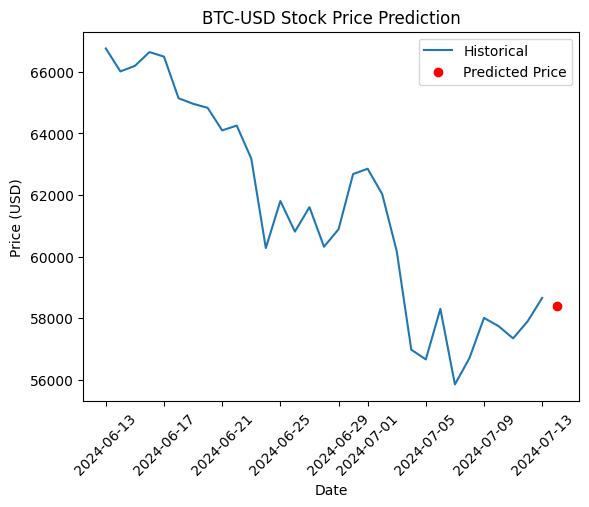

In [46]:
#Plotting Data
plt.plot(df_linear_model.index, df_linear_model['Close'], label = 'Historical')
plt.scatter(date_prediction, next_day_prediction, color = 'Red', label = 'Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.title(f'{ticker} Stock Price Prediction')
plt.legend()
plt.xticks(rotation = 45)
plt.show()


In [48]:
#Accuracy Test
average_close_price = df_linear_model['Close'].mean()
predicted_close_prices = linear_model.predict(df_linear_model[['Open', 'High', 'Low']])
mean_squared_error_linear = mean_squared_error(df_linear_model['Close'], predicted_close_prices)
mean_absolute_error_linear = mean_absolute_error(df_linear_model['Close'], predicted_close_prices)
mae_linear_percentage = (mean_absolute_error_linear / average_close_price) * 100

print('Mean Squared Error:', mean_squared_error_linear)
print('Mean Absolute Error:', mean_absolute_error_linear)
print('Mean Absolute Error Percentage:', mae_linear_percentage)

Mean Squared Error: 293986.0866785522
Mean Absolute Error: 414.1673727517874
Mean Absolute Error Percentage: 0.6735703610798408
